# Natural Language Processing with Disaster Tweets
The goal of the project is to build a machine learning model that can accurately predict whether
a tweet is about a real disaster or not. The outcome of the project will be a model that can be
used to classify new, unseen tweets, helping disaster relief organizations and news agencies to
quickly identify tweets that are relevant to disasters.

## Import the necessary libraries:
In this step, we are importing the necessary libraries that we will need to build and evaluate Multinomial Naive Bayes, Random Forest, Logistic Regression, and a Convolutional Neural Network (MLP) models for text classification.

In [78]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Load the data files into Pandas dataframes:
Here, we are loading the training and test data files into separate pandas dataframes. These dataframes will be used to train and evaluate the model.

In [79]:
# Load data files into Pandas dataframes
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### A quick look at our data

Let's look at our data... first, an example of what is NOT a disaster tweet.

In [80]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

And one that is:

In [81]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

## Preprocess data
This section removes unnecessary columns from the data frames and preprocesses the text data by removing stopwords, applying stemming, and applying lemmatization. The preprocessing functions are applied to the text column of the data frames.

In [82]:
# Remove unnecessary columns
train_df = train_df.drop(columns=['id', 'keyword', 'location'])
test_df = test_df.drop(columns=['keyword', 'location'])

# Define the preprocessing functions
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in word_tokenize(text) if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def apply_stemming(text):
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in word_tokenize(text)]
    return ' '.join(stemmed_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lem_words)

In [83]:
# Apply preprocessing techniques to the 'text' column
train_df['text'] = train_df['text'].apply(lambda x: remove_stopwords(x))
train_df['text'] = train_df['text'].apply(lambda x: apply_stemming(x))
train_df['text'] = train_df['text'].apply(lambda x: apply_lemmatization(x))

test_df['text'] = test_df['text'].apply(lambda x: remove_stopwords(x))
test_df['text'] = test_df['text'].apply(lambda x: apply_stemming(x))
test_df['text'] = test_df['text'].apply(lambda x: apply_lemmatization(x))

train_df.head()

,id,text
0,0,happen terribl car crash
1,2,"heard # earthquak differ citi , stay safe ever..."
2,3,"forest fire spot pond , gee flee across street..."
3,9,apocalyps light . # spokan # wildfir
4,11,typhoon soudelor kill 28 china taiwan


## Define the feature vector and the target variable:

At this step, we are defining the feature vector (X) and the target variable (y) for the logistic regression model. We are using the CountVectorizer from scikit-learn to convert the text into a numerical format that can be used for training the model.

In [84]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['text'])
y = train_df['target']

## Split the data into training and testing sets:
Now, we are splitting the data into a training set and a testing set. The training set will be used to train our models, while the testing set will be used to evaluate performance.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Multinomial Naive Bayes, Random Forest, Logistic Regression, and MLP model:
A dictionary is initialized to store the results of each model. The code then trains four models: Multinomial Naive Bayes, Random Forest, Logistic Regression, and a Convolutional Neural Network (MLP). The f1 score and confusion matrix of each model are printed and saved in the results dictionary.

In [86]:
# Initialize a dictionary to store the results
results = {}

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
print('Multinomial Naive Bayes')
print(classification_report(y_test, nb_pred))
print('F1 Score:', nb_f1)

# Save the results in the dictionary
results['Multinomial Naive Bayes'] = {'f1': nb_f1, 'confusion_matrix': confusion_matrix(y_test, nb_pred)}

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print('Random Forest')
print(classification_report(y_test, rf_pred))
print('F1 Score:', rf_f1)

# Save the results in the dictionary
results['Random Forest'] = {'f1': rf_f1, 'confusion_matrix': confusion_matrix(y_test, rf_pred)}

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
print(classification_report(y_test, lr_pred))
print('Logistic Regression F1 Score:', lr_f1)

# Save the results in the dictionary
results['Logistic Regression'] = {'f1': lr_f1, 'confusion_matrix': confusion_matrix(y_test, lr_pred)}

# Train a Convolutional Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=False, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
print(classification_report(y_test, mlp_pred))
print('MLP F1 Score:', mlp_f1)

# Save the results in the dictionary
results['MLP'] = {'f1': mlp_f1, 'confusion_matrix': confusion_matrix(y_test, mlp_pred)}

# Find the model with the highest F1 score
best_model = max(results, key=lambda k: results[k]['f1'])

# Print the results of the best model
print('\nBest Model: ', best_model)
print('F1 Score: ', results[best_model]['f1'])
print('Confusion Matrix: ')
print(results[best_model]['confusion_matrix'])

Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       874
           1       0.84      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523

F1 Score: 0.7974443782251693
Random Forest
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       874
           1       0.86      0.63      0.72       649

    accuracy                           0.80      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.81      0.80      0.79      1523

F1 Score: 0.7891786592906316
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.84      0.65      0.73       649

    accuracy                           0.80      1523
   macro avg       0.81      0.7

## Visualize model performance:
We are using ROC curve plot to visualize the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds. Also, a confusion matrix plot using seaborn.heatmap function, which shows the number of true positives, true negatives, false positives, and false negatives in a tabular format.

/Users/rubengonzalez/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/rubengonzalez/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/rubengonzalez/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :fu

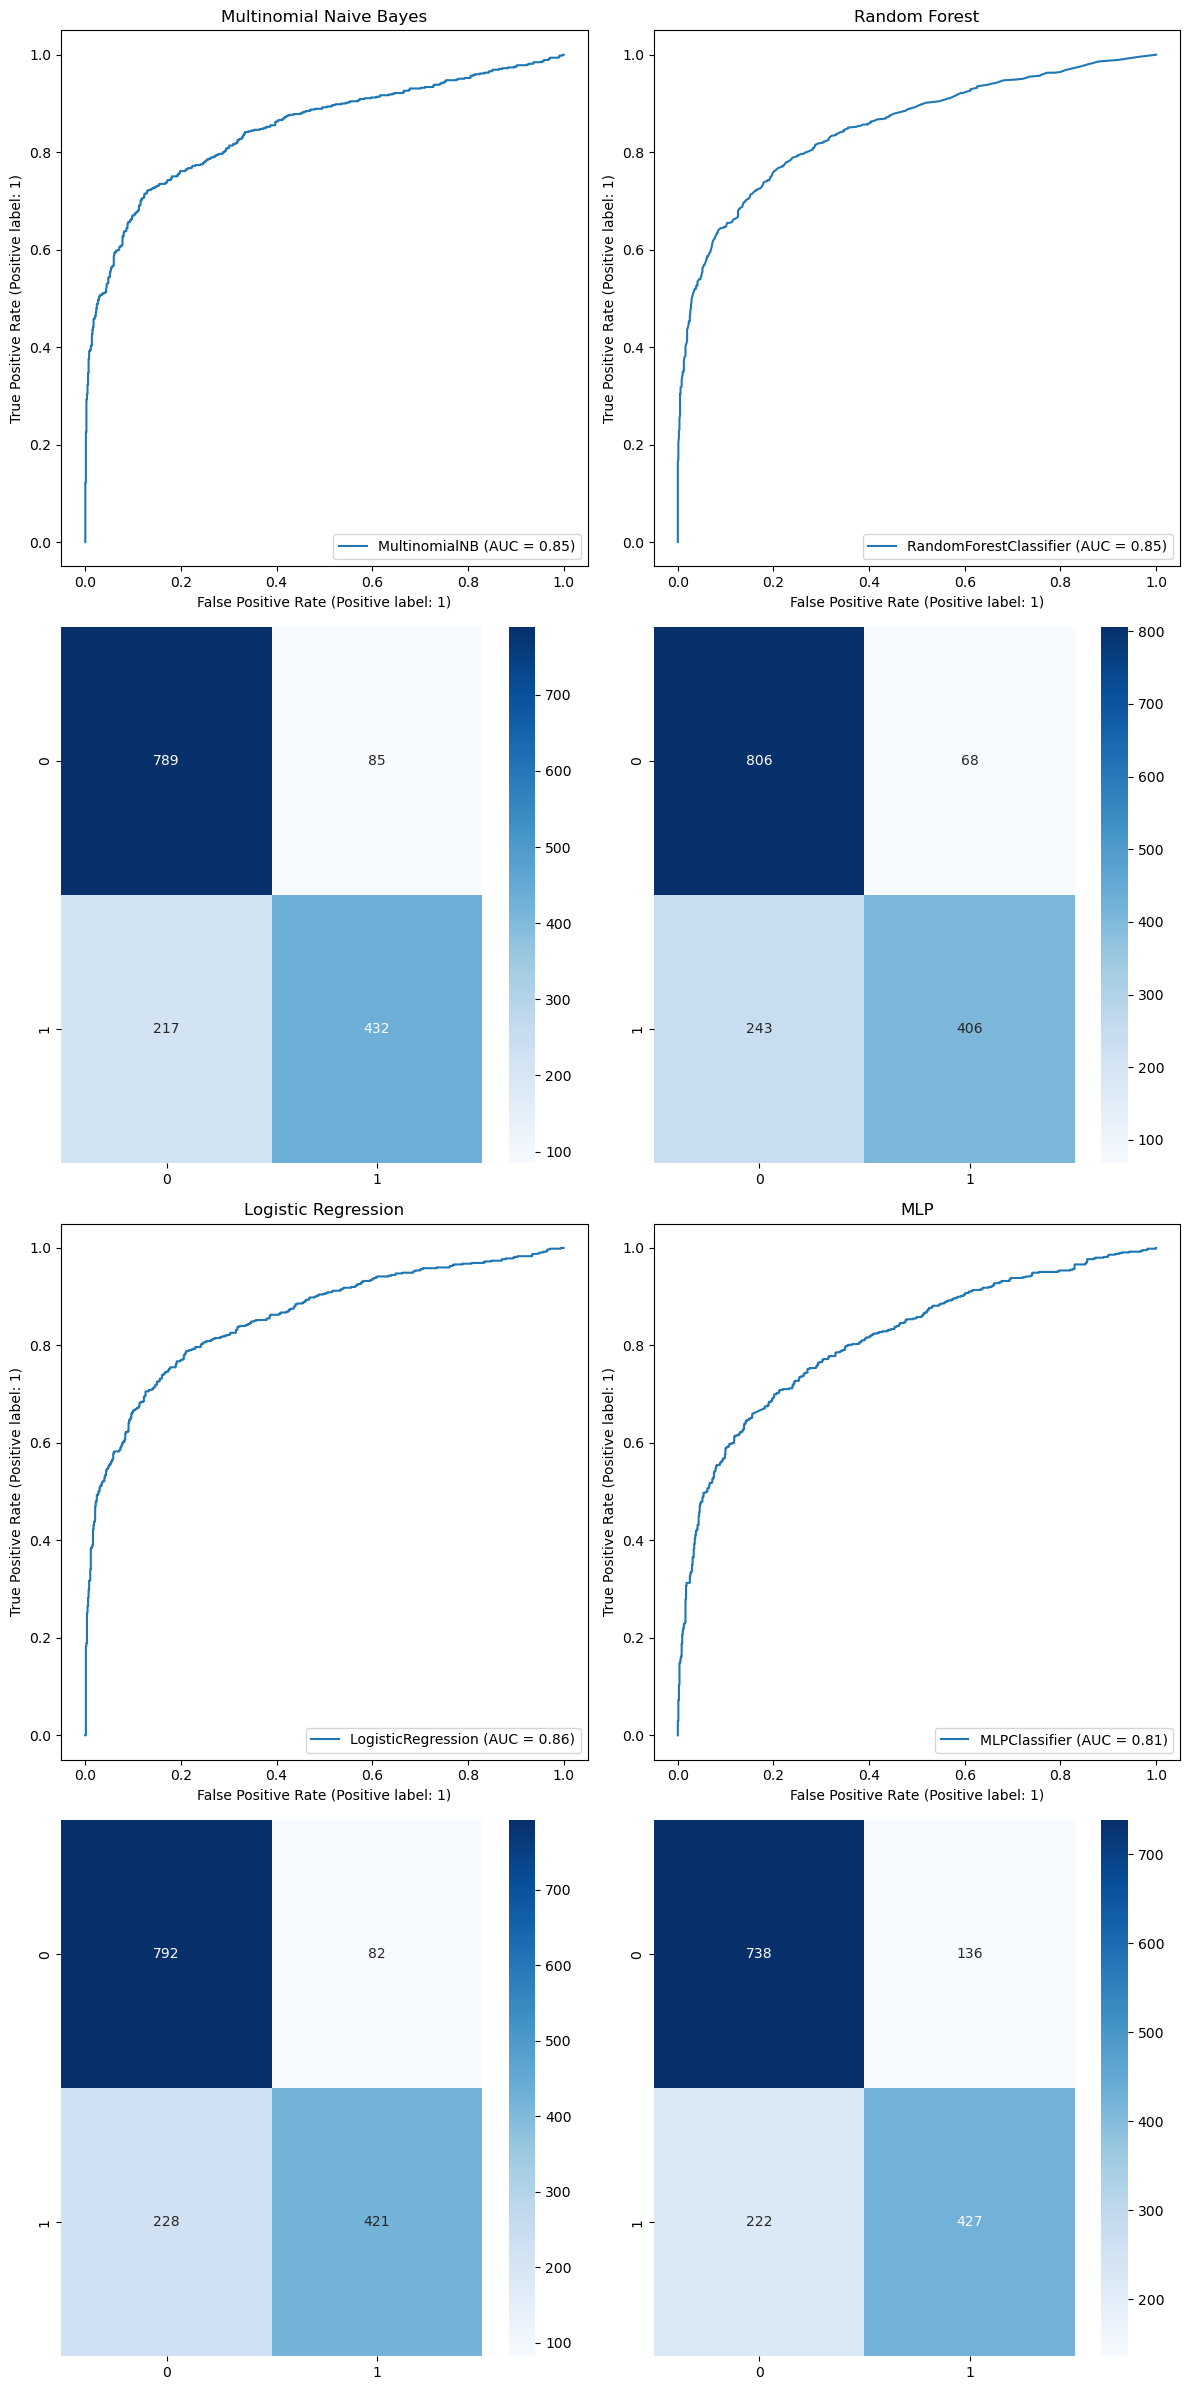

In [87]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))

# Multinomial Naive Bayes
axs[0, 0].set_title('Multinomial Naive Bayes')
plot_roc_curve(nb, X_test, y_test, ax=axs[0, 0])
sns.heatmap(confusion_matrix(y_test, nb_pred), ax=axs[1, 0], cmap='Blues', annot=True, fmt='d')

# Random Forest
axs[0, 1].set_title('Random Forest')
plot_roc_curve(rf, X_test, y_test, ax=axs[0, 1])
sns.heatmap(confusion_matrix(y_test, rf_pred), ax=axs[1, 1], cmap='Blues', annot=True, fmt='d')

# Logistic Regression
axs[2, 0].set_title('Logistic Regression')
plot_roc_curve(lr, X_test, y_test, ax=axs[2, 0])
sns.heatmap(confusion_matrix(y_test, lr_pred), ax=axs[3, 0], cmap='Blues', annot=True, fmt='d')

# MLP
axs[2, 1].set_title('MLP')
plot_roc_curve(mlp, X_test, y_test, ax=axs[2, 1])
sns.heatmap(confusion_matrix(y_test, mlp_pred), ax=axs[3, 1], cmap='Blues', annot=True, fmt='d')

plt.tight_layout()
plt.show()

## Make predictions on the test data:
Now we are making predictions on the test data using model with the best f1-score. We are using the transform method of the CountVectorizer to convert the test data into the same numerical format as the training data, and then using the predict method to make predictions.

In [88]:
model = None

if best_model == 'Multinomial Naive Bayes':
    model = nb
elif best_model == 'Random Forest':
    model = rf
elif best_model == 'Logistic Regression':
    model = lr
elif best_model == 'MLP':
    model = mlp

X_test = vectorizer.transform(test_df['text'])
predictions = model.predict(X_test)

## Create a submission file:
We create a submission file that will be submitted to the kaggle competition or used for other purposes. We are creating a pandas dataframe with the id column from the test data and the predicted target column from the highest f1-score model. Finally, we are saving this dataframe to a CSV file.

In [89]:
submission_df = pd.DataFrame({
    "id": test_df["id"],
    "target": predictions
})
submission_df.to_csv("data/submission.csv", index=False)